# Load dataset (Fashion MNIST)

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def load_mnist(path, kind='train'):
    import os
    import struct
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
y_train,y_test = y_train.astype(np.int64),y_test.astype(np.int64)
print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

Training set size: (60000, 784)
Testing set size: (10000, 784)


In [5]:
from matplotlib import pyplot as plt,cm
def show_img(im,figsize=None,ax=None,cmap=cm.binary):
    if not ax: fig,ax = plt.subplots(figsize = figsize)
    ax.imshow(im,cmap=cmap)
    return ax

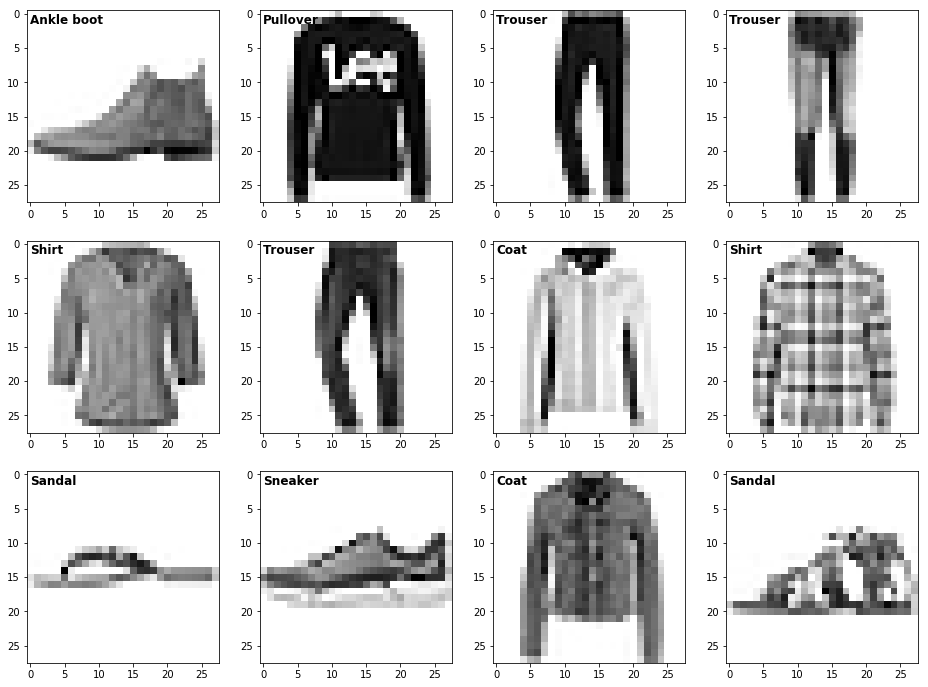

In [6]:
fig,axes=plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    _=show_img(X_test.reshape([-1,28,28])[i],ax=ax)
    _=ax.text(0,0, labels[y_test[i]],
        verticalalignment='top', color='black', fontsize=12, weight='bold')

# Normalize dataset (preprocessing for Neural Net)

In [6]:
n_mean = np.mean(X_train)
n_std = np.std(X_train)
n_mean,n_std

(72.94035223214286, 90.02118235130519)

In [7]:
X_train = np.array((X_train - n_mean)/n_std)
X_test = np.array((X_test - n_mean)/n_std)

In [8]:
X_train.shape

(60000, 784)

In [9]:
np.mean(X_train)

-1.74808013869143e-17

# Applying Neural net model
- Stochastic gradient descent
- 1 hidden layer
- Softmax activation for output layer, ReLU for other layers
- L2 regularization

In [75]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

In [76]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
layers

[784, 100, 10]

In [77]:
nn = CustomNeuralNetwork(layers,act_obj)

## No l2 regularization (l2=0)

Epoch 1. Training loss: 1.8771034547830523, Val loss:1.4138509879533712
Epoch 2. Training loss: 1.154748707785632, Val loss:1.132515522429195
Epoch 3. Training loss: 0.9653256473150501, Val loss:0.9616613572422017
Epoch 4. Training loss: 0.8748040840635344, Val loss:0.8839633187972206
Epoch 5. Training loss: 0.8227248420322085, Val loss:0.8481591791156681
Epoch 6. Training loss: 0.7890939904559386, Val loss:0.8261012640058542
Epoch 7. Training loss: 0.7656330725517118, Val loss:0.8077435064435304
Epoch 8. Training loss: 0.7477512303590126, Val loss:0.7918369711689723
Epoch 9. Training loss: 0.7327745906046397, Val loss:0.7827568312587805
Epoch 10. Training loss: 0.7224463526240968, Val loss:0.7759529611794669
Epoch 11. Training loss: 0.7129033105687037, Val loss:0.7597333995623692
Epoch 12. Training loss: 0.7050617041038713, Val loss:0.7571131934954437
Epoch 13. Training loss: 0.6978449069195521, Val loss:0.7485882783001141
Epoch 14. Training loss: 0.6909564489178832, Val loss:0.750012

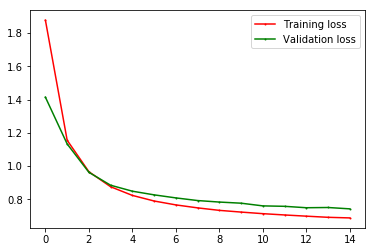

In [78]:
# nn.fit_epoch(X_tr,y_tr,X_t,y_t,lr=0.001,epochs=20,bs=64)
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=15,bs=64)

Epoch 1. Training loss: 0.6689067456213005, Val loss:0.7297481577711402
Epoch 2. Training loss: 0.6659318352350834, Val loss:0.7288030659465489
Epoch 3. Training loss: 0.664790318966038, Val loss:0.7280979921885207
Epoch 4. Training loss: 0.6639060740034987, Val loss:0.7273078288456293
Epoch 5. Training loss: 0.6630601335945387, Val loss:0.7261199367532609
Epoch 6. Training loss: 0.6623378823983502, Val loss:0.7254413061242625
Epoch 7. Training loss: 0.6613181736992416, Val loss:0.7237905352494582
Epoch 8. Training loss: 0.659916229596847, Val loss:0.7229891040636177
Epoch 9. Training loss: 0.6585625411594064, Val loss:0.7219979092046825
Epoch 10. Training loss: 0.6574939197399878, Val loss:0.7205543289018634
Epoch 11. Training loss: 0.6563142987605742, Val loss:0.7198566662004927
Epoch 12. Training loss: 0.6554444039614338, Val loss:0.7193675499032651
Epoch 13. Training loss: 0.6545870229595507, Val loss:0.7182199697857301
Epoch 14. Training loss: 0.6534486871495073, Val loss:0.717545

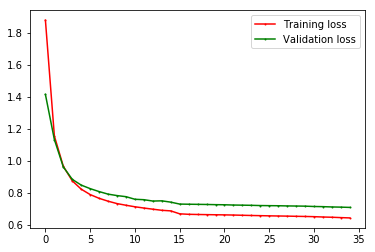

In [79]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=64)

Epoch 1. Training loss: 0.5596586491315698, Val loss:0.6312066068582752
Epoch 2. Training loss: 0.5571859383675359, Val loss:0.6298290251806993
Epoch 3. Training loss: 0.554701672164669, Val loss:0.6275565215673226
Epoch 4. Training loss: 0.5523381824904778, Val loss:0.6302461910885698
Epoch 5. Training loss: 0.5487957066401439, Val loss:0.6252625333942159


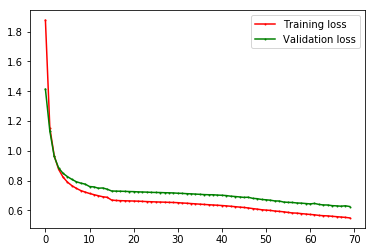

In [84]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=5,bs=64)

Epoch 1. Training loss: 0.4941400206620493, Val loss:0.590676990753819
Epoch 2. Training loss: 0.4946366961501341, Val loss:0.589084354345707
Epoch 3. Training loss: 0.4944096803251636, Val loss:0.5867304823131647
Epoch 4. Training loss: 0.4937597725409876, Val loss:0.5869144938028048
Epoch 5. Training loss: 0.49334033680711664, Val loss:0.5854797370732794
Epoch 6. Training loss: 0.49311944216399256, Val loss:0.5883891636946837
Epoch 7. Training loss: 0.49212711779214546, Val loss:0.5869322142779355
Epoch 8. Training loss: 0.49250962996186565, Val loss:0.5884891423589911
Epoch 9. Training loss: 0.4918992114356469, Val loss:0.5912330808828907
Epoch 10. Training loss: 0.4923258494824275, Val loss:0.5853805363759547
Epoch 11. Training loss: 0.491854016458268, Val loss:0.586550120374631
Epoch 12. Training loss: 0.4902228750469701, Val loss:0.586468442171632
Epoch 13. Training loss: 0.49137009881597443, Val loss:0.5826137770613494
Epoch 14. Training loss: 0.48987883169389285, Val loss:0.583

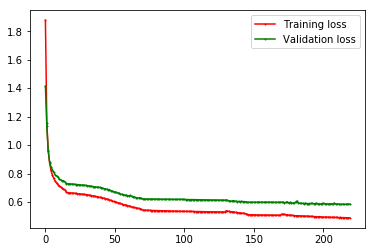

In [101]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0007,epochs=20,bs=64)

## With l2 regularization

In [111]:
nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 1.8083387116375234, Val loss:1.2157122136061256
Epoch 2. Training loss: 0.9907199862654917, Val loss:0.8910356316775028
Epoch 3. Training loss: 0.8119659387212658, Val loss:0.7831726962000436
Epoch 4. Training loss: 0.7337088713185738, Val loss:0.728931178386339
Epoch 5. Training loss: 0.6921509224812387, Val loss:0.6982732815025192
Epoch 6. Training loss: 0.6652734909574292, Val loss:0.677637117903249
Epoch 7. Training loss: 0.6453808332694018, Val loss:0.6605605354536852
Epoch 8. Training loss: 0.6249661187582347, Val loss:0.6354026961064031
Epoch 9. Training loss: 0.5960254696416768, Val loss:0.6029581757310328
Epoch 10. Training loss: 0.5590731042115835, Val loss:0.564604218326744
Epoch 11. Training loss: 0.5253674281758092, Val loss:0.5381228914040915
Epoch 12. Training loss: 0.5045387271272441, Val loss:0.5235174529814243
Epoch 13. Training loss: 0.4929782447420199, Val loss:0.5149587458579478
Epoch 14. Training loss: 0.4864712751519274, Val loss:0.5093110

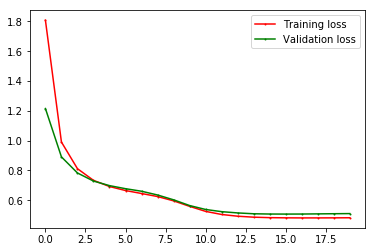

In [112]:
# nn.fit_epoch(X_tr,y_tr,X_t,y_t,lr=0.001,epochs=20,bs=64)
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=20,bs=64,l2=2)

Epoch 1. Training loss: 0.4445215331838274, Val loss:0.477618227959615
Epoch 2. Training loss: 0.4438907995951374, Val loss:0.4770704975016091
Epoch 3. Training loss: 0.44328766879806064, Val loss:0.47654214088802127
Epoch 4. Training loss: 0.4427058531917535, Val loss:0.4760209448861838
Epoch 5. Training loss: 0.442150215112981, Val loss:0.4755234359095782
Epoch 6. Training loss: 0.4416153260858755, Val loss:0.4750360655824364
Epoch 7. Training loss: 0.44109876001735493, Val loss:0.4745689003033035
Epoch 8. Training loss: 0.4406052962423707, Val loss:0.4741262952747189
Epoch 9. Training loss: 0.44013083120510355, Val loss:0.47370525000761865
Epoch 10. Training loss: 0.4396751045262685, Val loss:0.4733073218935739


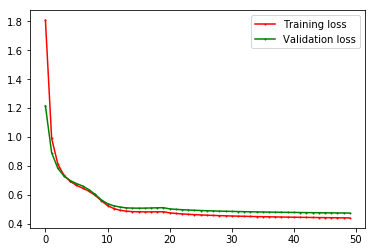

In [115]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=10,bs=64,l2=1)

Epoch 1. Training loss: 0.40606523072164447, Val loss:0.44433230152400965
Epoch 2. Training loss: 0.40574724920380256, Val loss:0.44406530797913435
Epoch 3. Training loss: 0.4054357716638204, Val loss:0.443799176914283
Epoch 4. Training loss: 0.4051286409118095, Val loss:0.4435284069864698
Epoch 5. Training loss: 0.40482585733738274, Val loss:0.44327294467260664
Epoch 6. Training loss: 0.40452732685968984, Val loss:0.4430228320217254
Epoch 7. Training loss: 0.4042333501732743, Val loss:0.44277975675447934
Epoch 8. Training loss: 0.4039456754974501, Val loss:0.44253445058616053
Epoch 9. Training loss: 0.40366255602319095, Val loss:0.442298674312642
Epoch 10. Training loss: 0.40338347311399847, Val loss:0.44206557980231737
Epoch 11. Training loss: 0.4031073455902809, Val loss:0.44182535719665084
Epoch 12. Training loss: 0.4028346127975013, Val loss:0.441589792722398
Epoch 13. Training loss: 0.4025650693195846, Val loss:0.4413644926523778
Epoch 14. Training loss: 0.40230071882953955, Val 

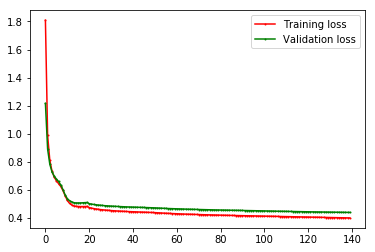

In [121]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0008,epochs=20,bs=64,l2=0.5)

Epoch 1. Training loss: 0.3748852800876757, Val loss:0.4178687839671803
Epoch 2. Training loss: 0.37309860458105065, Val loss:0.41668627374513045
Epoch 3. Training loss: 0.37167896980766396, Val loss:0.41567089402510593
Epoch 4. Training loss: 0.37047693460854614, Val loss:0.41485573042952384
Epoch 5. Training loss: 0.36942075412136455, Val loss:0.41409628604415993
Epoch 6. Training loss: 0.3684635100250325, Val loss:0.4133997011333377
Epoch 7. Training loss: 0.36756438617544396, Val loss:0.41268536490702373
Epoch 8. Training loss: 0.3667024612496594, Val loss:0.4120334883002797
Epoch 9. Training loss: 0.3658780711505868, Val loss:0.41150736256516085
Epoch 10. Training loss: 0.36510698396731556, Val loss:0.41085330295961286
Epoch 11. Training loss: 0.36430205931727444, Val loss:0.4099677401098277
Epoch 12. Training loss: 0.3635063209591542, Val loss:0.40940353942092655
Epoch 13. Training loss: 0.3627855462420532, Val loss:0.40900116517676616
Epoch 14. Training loss: 0.36211597036531906

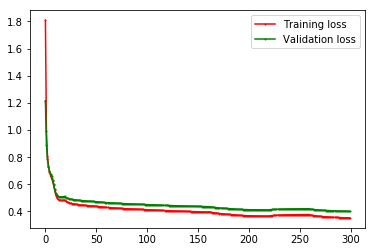

In [130]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.004,epochs=40,bs=64,l2=0.3)

# Evaluate neural net

In [125]:
from model.metrics import accuracy

In [131]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.855

In [127]:
# Compute confusion matrix for a model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

<Figure size 720x720 with 0 Axes>

Text(69,0.5,'True label')

Text(0.5,69,'Predicted label')

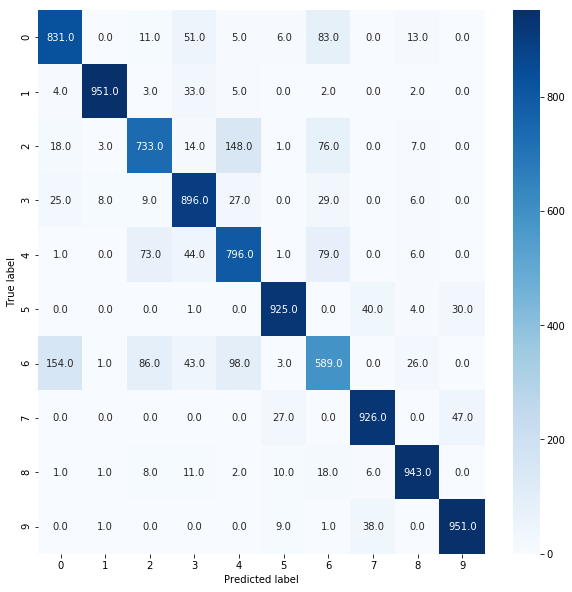

In [128]:
# view with a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.1f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Conclusion
With better weight control (l2 reg), it's faster to reach a better log loss score on validation set (for l2 model it only took 14 epochs). Combining with manual fine tuning on learning rate and l2 rate, this model achieves 85% accuracy on test set. This is really good comparing to the NN pytorch module I created [here](https://github.com/anhquan0412/basic_model_scratch/blob/master/NN_pytorch.ipynb) which achieves 87% acccuracy using batch normalization, dropout and Adam optimizer. 


# Extra

## Sigmoid activation?

In [12]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

act_obj = Sigmoid()
layers = [X_train.shape[1],100,10]
layers

nn = CustomNeuralNetwork(layers,act_obj)

[784, 100, 10]

Epoch 1. Training loss: 0.9309983100647945, Val loss:0.9291420872550893
Epoch 2. Training loss: 0.8977144090391366, Val loss:0.9017832532062026
Epoch 3. Training loss: 0.8718275182327435, Val loss:0.8798915417961698
Epoch 4. Training loss: 0.8504558021805738, Val loss:0.8617251700355218
Epoch 5. Training loss: 0.8324501542122655, Val loss:0.8465078693870566
Epoch 6. Training loss: 0.8172009426057334, Val loss:0.8337816678815881
Epoch 7. Training loss: 0.8045029657318101, Val loss:0.8232849572441899
Epoch 8. Training loss: 0.7946432641245492, Val loss:0.8155651748494679
Epoch 9. Training loss: 0.788663587559523, Val loss:0.8124127283583404
Epoch 10. Training loss: 0.787643332611888, Val loss:0.8145390812132146
Epoch 11. Training loss: 0.7914148079502908, Val loss:0.8203557184556852
Epoch 12. Training loss: 0.7991840746739717, Val loss:0.8293468855342535
Epoch 13. Training loss: 0.8072255429204933, Val loss:0.8339613323264734
Epoch 14. Training loss: 0.8076219710418114, Val loss:0.828999

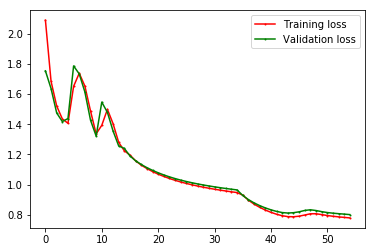

In [15]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=20,bs=64,l2=1)

With sigmoid, model is slower to learn. This can be the result of vanishing gradient problem as sigmoid's gradient is easier to approach 0 when inputs are at two extreme ends.

## Leaky ReLU activation?

In [72]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

act_obj = LeakyReLU(0.05)
layers = [X_train.shape[1],100,10]
layers

nn = CustomNeuralNetwork(layers,act_obj)

[784, 100, 10]

Epoch 1. Training loss: 1.5849617919165726, Val loss:1.4197751509878096
Epoch 2. Training loss: 0.9805094579052548, Val loss:1.1441239569704105
Epoch 3. Training loss: 0.7974767657420401, Val loss:0.9602993323307092
Epoch 4. Training loss: 0.6964281851510783, Val loss:0.7966386423206405
Epoch 5. Training loss: 0.6289449646579724, Val loss:0.6839006874515526
Epoch 6. Training loss: 0.5797113343301546, Val loss:0.6168042682928517
Epoch 7. Training loss: 0.5483412857754683, Val loss:0.5753926810657303
Epoch 8. Training loss: 0.5282240336121999, Val loss:0.5503813872308126
Epoch 9. Training loss: 0.5147544068016364, Val loss:0.535457216297323
Epoch 10. Training loss: 0.5057748574709022, Val loss:0.5260676268981492
Epoch 11. Training loss: 0.4990184096138373, Val loss:0.5193347401485064
Epoch 12. Training loss: 0.49342125248918645, Val loss:0.5144479618866981
Epoch 13. Training loss: 0.4891925966428873, Val loss:0.5109990500618121
Epoch 14. Training loss: 0.48600000167343965, Val loss:0.508

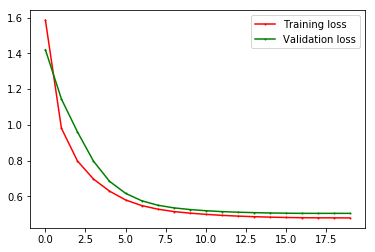

In [73]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.005,epochs=20,bs=64,l2=2)